In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Importing The DataSet And Loading It

In [176]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv("test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Exploring The Data

In [177]:
target = train_df["SalePrice"]

In [178]:
Ames_Iowa = train_df.copy()
Ames_Iowa = train_df.drop(columns=["Id", "SalePrice"])
Ames_Iowa_full = train_df.copy()
Ames_Iowa_full = Ames_Iowa_full.drop(columns="Id")
Ames_Iowa_full


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [179]:
Ames_Iowa.shape

(1460, 79)

In [180]:
Ames_Iowa.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


<Axes: >

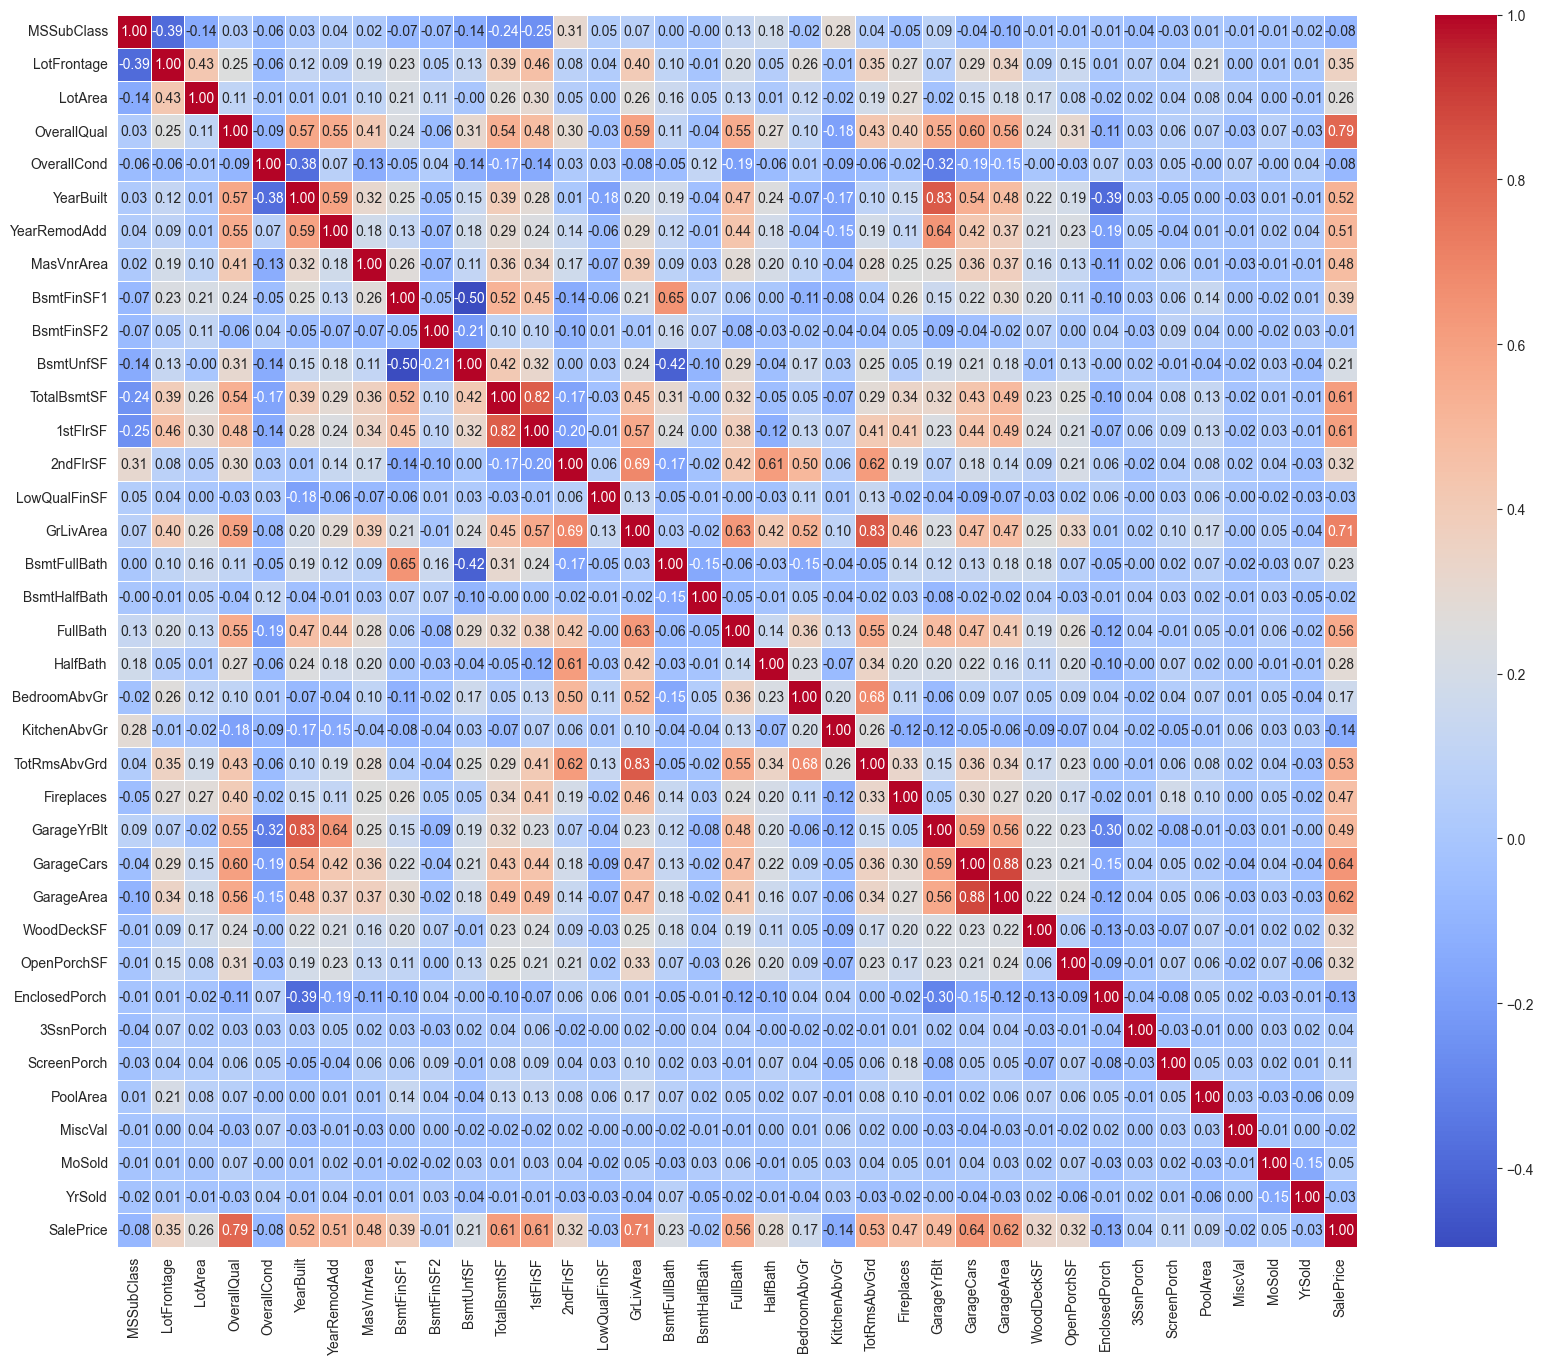

In [181]:
corr_mat = Ames_Iowa_full.corr(numeric_only=1)
plt.figure(figsize=(20, 16))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)


##  Preprocessing Overview

In this section, we apply consistent preprocessing steps to both the **training** and **testing** datasets to prepare them for modeling.

###  Key Steps:
- **Handle missing values**: Impute or flag missing data based on domain knowledge (e.g., `Alley`, `GarageYrBlt`, `MasVnrType`, etc.).
- **Map ordinal features**: Convert quality ratings (e.g., `Ex`, `Gd`, `TA`) to numeric scales for ordinal interpretation.
- **Group rare categories**: Collapse less frequent or similar categories to reduce dimensionality (e.g., `MSSubClass`, `Neighborhood`, `LotConfig`).
- **One-hot encode categorical variables**: Use `pd.get_dummies()` with `drop_first=True` to avoid multicollinearity.
- **Create binary indicator features**: Add flags for presence/absence of features (`HasAlley`, `HasMiscFeature`, etc.).
- **Ensure feature alignment**: Maintain consistent columns between train and test for compatibility during prediction.

>
 > Note: The test set contains missing patterns not present in the training set. We've manually extended preprocessing for the test data to handle these cases safely.



In [182]:
Ames_Iowa.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [183]:
newdf = Ames_Iowa_full.copy()
newdf.LotFrontage = newdf.LotFrontage.fillna(newdf.LotFrontage.mean())


<Axes: xlabel='BsmtExposure', ylabel='SalePrice'>

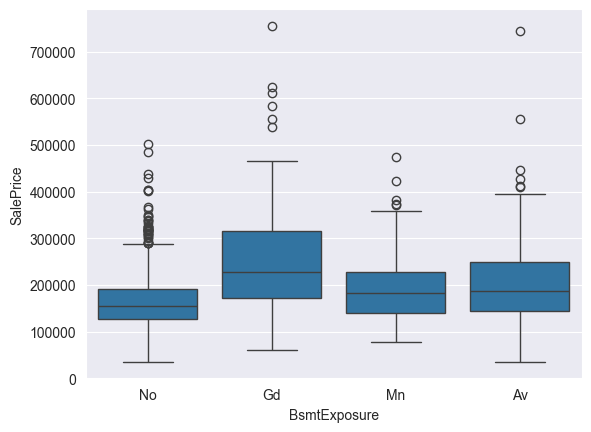

In [184]:
sns.boxplot(x='BsmtExposure', y='SalePrice', data=newdf)

In [185]:
newdf.groupby('MSZoning')['SalePrice'].median().sort_values()


MSZoning
C (all)     74700.0
RM         120500.0
RH         136500.0
RL         174000.0
FV         205950.0
Name: SalePrice, dtype: float64

In [186]:
newdf.groupby('Functional')['SalePrice'].median().sort_values()

Functional
Maj2     85000.0
Sev     129000.0
Mod     137900.0
Min1    139000.0
Min2    140000.0
Maj1    140750.0
Typ     165500.0
Name: SalePrice, dtype: float64

In [187]:
newdf["Functional"].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [188]:
# # IMPORTING
#
# from sklearn.compose import ColumnTransformer
# from sklearn.base import BaseEstimator, TransformerMixin
#
# # 1. Binary features
# class FeatureCreator(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None): return self
#     def transform(self, X):
#         X = X.copy()
#         X['HasAlley'] = X['Alley'].notnull().astype(int)
#         X['HasMiscFeature'] = X['MiscFeature'].notnull().astype(int)
#         X['IsCentralAir'] = (X['CentralAir'] == 'Y').astype(int)
#         X['PavedDrive'] = X['PavedDrive'].apply(lambda c: 'N' if c in ['N', 'P'] else c)
#         X['IsPaved'] = (X['PavedDrive'] == 'Y').astype(int)
#         X['Remodadded'] = (X['YearRemodAdd'] != X['YearBuilt']).astype(int)
#         X['GarageYrBlt_missing'] = X['GarageYrBlt'].isna().astype(int)
#         X['HasNonNormCond2'] = (X['Condition2'] != 'Norm').astype(int)
#         return X.drop(columns=['Alley', 'MiscFeature', 'CentralAir', 'PavedDrive','Condition2'], errors='ignore')
#
# # 2. Ordinal mapping
# class OrdinalMapper(BaseEstimator, TransformerMixin):
#     def __init__(self, mapping_dict): self.mapping_dict = mapping_dict
#     def fit(self, X, y=None): return self
#     def transform(self, X):
#         X = X.copy()
#         for col, mapping in self.mapping_dict.items():
#             if col in X.columns:
#                 X[col] = X[col].map(mapping).fillna(0)
#         return X
#
# # 3. Grouping-based categorical mapping
# class GroupMapper(BaseEstimator, TransformerMixin):
#     def __init__(self, grouping_dict):
#         self.grouping_dict = grouping_dict
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         X = X.copy()
#         for col, groupings in self.grouping_dict.items():
#             if col == "MSSubClass":
#                 X[col] = X[col].astype(str)
#
#             def map_value(val):
#                 for group_name, values in groupings.items():
#                     if val in values:
#                         return group_name
#                 return val
#
#             X[col] = X[col].map(map_value)
#         return X
#
# # 4. Simple categorical imputation
# class SimpleCatImputer(BaseEstimator, TransformerMixin):
#     def __init__(self, fill_values=None): self.fill_values = fill_values
#     def fit(self, X, y=None):
#         self.fill_values_ = self.fill_values or {col: X[col].mode()[0] for col in X.columns}
#         self.fill_values_['MSZoning'] = 'NoMSZoning'
#         self.fill_values_['Fence'] = 'NoFence'
#         self.fill_values_['GarageType'] = 'NoGarage'
#         return self
#     def transform(self, X):
#         X = X.copy()
#         for col, val in self.fill_values_.items():
#             X[col] = X[col].fillna(val)
#         return X
#
# # 5. Numeric value imputer
# class ValueImputer(BaseEstimator, TransformerMixin):
#     def __init__(self, strategy_dict): self.strategy_dict = strategy_dict
#     def fit(self, X, y=None):
#         self.fill_values_ = {}
#         for col, strategy in self.strategy_dict.items():
#             if strategy == 'mean':
#                 self.fill_values_[col] = X[col].mean()
#             elif strategy == 'median':
#                 self.fill_values_[col] = X[col].median()
#             else:
#                 self.fill_values_[col] = strategy
#         return self
#     def transform(self, X):
#         X = X.copy()
#         for col, val in self.fill_values_.items():
#             X[col] = X[col].fillna(val)
#         return X
#
# # 6. Masonry handler
# class MasonryHandler(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None): return self
#     def transform(self, X):
#         X = X.copy()
#         X['MasVnrType'] = X['MasVnrType'].fillna('NoMasonry')
#         X['MasVnrArea'] = X['MasVnrArea'].fillna(0)
#         X['HasA_Masonry_Veneer'] = X['MasVnrType'].notnull().astype(int)
#         return X
#
# # 7. Column dropper
# class ColumnDropper(BaseEstimator, TransformerMixin):
#     def __init__(self, columns): self.columns = columns
#     def fit(self, X, y=None): return self
#     def transform(self, X): return X.drop(columns=self.columns, errors='ignore')


In [189]:
from CustomTransformers import (
    FeatureCreator, MasonryHandler, OrdinalMapper, GroupMapper,
    SimpleCatImputer, ValueImputer, ColumnDropper
)

In [190]:
# SECTION FOR DICTS THAT IS NEEDED FOR THE FUNCTIONS TO WORK

grouping_dict = {
    'Neighborhood': {
        'LowPrice': ['MeadowV', 'IDOTRR', 'BrDale', 'OldTown'],
        'MidLowPrice': ['Edwards', 'BrkSide', 'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel'],
        'MidHighPrice': ['SawyerW', 'Gilbert', 'NWAmes'],
        'HighPrice': ['Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor', 'Veenker', 'Somerst', 'Timber'],
        'VeryHighPrice': ['StoneBr', 'NoRidge', 'NridgHt']
    },

    'Condition1': {
        'LowCond': ['Artery', 'Feedr'],
        'NormalCond': ['Norm'],
        'PremiumCond': ['PosA', 'PosN', 'RRNn', 'RRAn', 'RRNe', 'RRAe']
    },

    'Heating': {
        'GasA': ['GasA'],
        'OtherGas': ['GasW'],
        'AltHeating': ['Grav', 'Wall', 'OthW', 'Floor']
    },

    'LotConfig': {
        'NormalLot': ['Inside', 'Corner', 'FR2'],
        'PremuimLot': ['FR3', 'CulDSac']
    },

    'LandSlope': {
        'Gtl': ['Gtl'],
        'Others': ['Sev', 'Mod']
    },

    'Functional': {
        'Typ': ['Typ'],
        'Meduim Deduction': ['Min1', 'Min2', 'Mod', 'Maj1'],
        'Other': ['Maj2', 'Sev', 'Sal']
    },

    'MSSubClass': {
        'LowCost': ['180', '30', '45'],
        'MidCost': ['190', '90', '85', '50', '40'],
        'UpperMidCost': ['70', '160']

    }
}
ordinal_mappings = {
    'BsmtQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
    'BsmtCond': {"Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
    'BsmtExposure': {"Gd": 4, "Av": 3, "Mn": 2, "No": 1},
    'BsmtFinType1': {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1},
    'BsmtFinType2': {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1},
    'Electrical': {"SBrkr": 5, "FuseA": 4, "FuseF": 3, "FuseP": 2, "Mix": 1},
    'FireplaceQu': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
    'GarageFinish': {"Fin": 3, "RFn": 2, "Unf": 1},
    'GarageQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
    'PoolQC': {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1},
    'ExterQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
    'ExterCond': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
    'HeatingQC': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
    'KitchenQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
    'Street' : {"Pave": 1, "Grvl": 0}
}

num_fill = {
    'BsmtFinSF1': newdf['BsmtFinSF1'].mean(),
    'BsmtFinSF2': newdf['BsmtFinSF2'].mean(),
    'BsmtUnfSF': newdf['BsmtUnfSF'].mean(),
    'TotalBsmtSF': newdf['TotalBsmtSF'].mean(),
    'LotFrontage': round(newdf['LotFrontage'].mean()),
    'GarageCars': 1,
    'GarageArea': 300,
    'BsmtFullBath': 0,
    'BsmtHalfBath': 0

}

onehot = [
    'MasVnrType',
    'GarageType',
    'Fence',
    'MSSubClass',
    'LotShape',
    'LandContour',
    'MSZoning',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'Foundation',
    'SaleType',
    'SaleCondition',
    'Heating',
    'Functional'
]

cat_fill = ['MSZoning', 'Exterior1st', 'Exterior2nd']


In [191]:
newdf

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [192]:
# BUILDING THE PIPELINES
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

pipeline_first = Pipeline([
    ('feature_creator', FeatureCreator()),
    ('masonry', MasonryHandler()),
    ('ordinal', OrdinalMapper(ordinal_mappings)),
    ('grouping', GroupMapper(grouping_dict)),
    ('cat_fill', SimpleCatImputer({col: 'mode' for col in cat_fill})),
    ('num_fill', ValueImputer(num_fill)),
    ('dropper', ColumnDropper(['GarageCond', 'Utilities', 'GarageYrBlt']))
])
X_preprocessed = pipeline_first.fit_transform(newdf)
X_preprocessed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,SaleCondition,SalePrice,HasAlley,HasMiscFeature,IsCentralAir,IsPaved,Remodadded,GarageYrBlt_missing,HasNonNormCond2,HasA_Masonry_Veneer
0,60,RL,65.0,8450,1,Reg,Lvl,NormalLot,Gtl,HighPrice,...,Normal,208500,0,0,1,1,0,0,0,1
1,20,RL,80.0,9600,1,Reg,Lvl,NormalLot,Gtl,HighPrice,...,Normal,181500,0,0,1,1,0,0,0,1
2,60,RL,68.0,11250,1,IR1,Lvl,NormalLot,Gtl,HighPrice,...,Normal,223500,0,0,1,1,1,0,0,1
3,UpperMidCost,RL,60.0,9550,1,IR1,Lvl,NormalLot,Gtl,HighPrice,...,Abnorml,140000,0,0,1,1,1,0,0,1
4,60,RL,84.0,14260,1,IR1,Lvl,NormalLot,Gtl,VeryHighPrice,...,Normal,250000,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,1,Reg,Lvl,NormalLot,Gtl,MidHighPrice,...,Normal,175000,0,0,1,1,1,0,0,1
1456,20,RL,85.0,13175,1,Reg,Lvl,NormalLot,Gtl,MidHighPrice,...,Normal,210000,0,0,1,1,1,0,0,1
1457,UpperMidCost,RL,66.0,9042,1,Reg,Lvl,NormalLot,Gtl,HighPrice,...,Normal,266500,0,1,1,1,1,0,0,1
1458,20,RL,68.0,9717,1,Reg,Lvl,NormalLot,Gtl,MidLowPrice,...,Normal,142125,0,0,1,1,1,0,0,1


In [193]:
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore',drop="first"), onehot),
],remainder="passthrough")

In [194]:
newdf

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [195]:
clean_pipeline = Pipeline([
    ('full_preprocessing', pipeline_first),
    ('column_transformer', column_transformer)
])
df = train_df.drop(columns=["SalePrice","Id"],axis=1)
X_cleaned = clean_pipeline.fit_transform(df)

# Get one-hot feature names
encoder = clean_pipeline.named_steps['column_transformer'].named_transformers_['onehot']
onehot_feature_names = encoder.get_feature_names_out(onehot)

#Get passthrough column names
remainder_cols = [
    col for col in X_preprocessed.columns if col not in onehot
]

final_feature_names = np.concatenate([onehot_feature_names, remainder_cols])
final_feature_names = final_feature_names[final_feature_names != "SalePrice"]

print(final_feature_names)

df_cleaned = pd.DataFrame(X_cleaned, columns=final_feature_names)
df_cleaned



['MasVnrType_BrkFace' 'MasVnrType_NoMasonry' 'MasVnrType_Stone'
 'GarageType_Attchd' 'GarageType_Basment' 'GarageType_BuiltIn'
 'GarageType_CarPort' 'GarageType_Detchd' 'GarageType_NoGarage'
 'Fence_GdWo' 'Fence_MnPrv' 'Fence_MnWw' 'Fence_NoFence' 'MSSubClass_20'
 'MSSubClass_60' 'MSSubClass_75' 'MSSubClass_80' 'MSSubClass_LowCost'
 'MSSubClass_MidCost' 'MSSubClass_UpperMidCost' 'LotShape_IR2'
 'LotShape_IR3' 'LotShape_Reg' 'LandContour_HLS' 'LandContour_Low'
 'LandContour_Lvl' 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL' 'MSZoning_RM'
 'LotConfig_PremuimLot' 'LandSlope_Others' 'Neighborhood_LowPrice'
 'Neighborhood_MidHighPrice' 'Neighborhood_MidLowPrice'
 'Neighborhood_VeryHighPrice' 'Condition1_NormalCond'
 'Condition1_PremiumCond' 'BldgType_2fmCon' 'BldgType_Duplex'
 'BldgType_Twnhs' 'BldgType_TwnhsE' 'HouseStyle_1.5Unf'
 'HouseStyle_1Story' 'HouseStyle_2.5Fin' 'HouseStyle_2.5Unf'
 'HouseStyle_2Story' 'HouseStyle_SFoyer' 'HouseStyle_SLvl'
 'RoofStyle_Gable' 'RoofStyle_Gambrel' 'RoofSt

,MasVnrType_BrkFace,MasVnrType_NoMasonry,MasVnrType_Stone,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,Fence_GdWo,...,MoSold,YrSold,HasAlley,HasMiscFeature,IsCentralAir,IsPaved,Remodadded,GarageYrBlt_missing,HasNonNormCond2,HasA_Masonry_Veneer
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2008.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2007.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,2008.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,2006.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,2008.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2007.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1456,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2010.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1457,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2010.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1458,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2010.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [196]:
# # TESTING SET
#
# test_processed = test_df.copy()
#
# # --- ALLEY FEATURE ---
# test_processed['HasAlley'] = test_processed['Alley'].notnull().astype(int)
# test_processed.drop(columns="Alley", inplace=True)
#
# # --- MASONRY VENEER HANDLING (Follow Testing Set Logic) ---
# test_processed['MasVnrType'] = test_processed['MasVnrType'].fillna('NoMasonry')
# test_processed['MasVnrArea'] = test_processed['MasVnrArea'].fillna(0)
# test_processed['HasA_Masonry_Veneer'] = test_processed['MasVnrType'].notnull().astype(int)
# test_processed = pd.get_dummies(test_processed, columns=['MasVnrType'], prefix='MasVnrType', drop_first=True)
#
# # --- BASIC CATEGORICAL IMPUTATION (Combined Strategy) ---
# test_processed['MSZoning'] = test_processed['MSZoning'].fillna('NoMSZoning')
# for col in ['Exterior1st', 'Exterior2nd']:
#     test_processed[col] = test_processed[col].fillna(test_processed[col].mode()[0])
#
# # --- LOT FRONTAGE ---
# test_processed['LotFrontage'] = test_processed['LotFrontage'].fillna(test_processed['LotFrontage'].mean())
#
# # --- ORDINAL MAPPINGS (From Testing Set, more complete) ---
# ordinal_mappings = {
#     'BsmtQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'BsmtCond': {"Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'BsmtExposure': {"Gd": 4, "Av": 3, "Mn": 2, "No": 1},
#     'BsmtFinType1': {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1},
#     'BsmtFinType2': {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1},
#     'Electrical': {"SBrkr": 5, "FuseA": 4, "FuseF": 3, "FuseP": 2, "Mix": 1},
#     'FireplaceQu': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'GarageFinish': {"Fin": 3, "RFn": 2, "Unf": 1},
#     'GarageQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'GarageCond': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'PoolQC': {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1},
#     'ExterQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'ExterCond': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'HeatingQC': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'KitchenQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# }
# for col, mapping in ordinal_mappings.items():
#     test_processed[col] = test_processed[col].map(mapping).fillna(0)
#
# # --- GARAGE FEATURES ---
# test_processed['GarageType'] = test_processed['GarageType'].fillna("NoGarage")
# test_processed = pd.get_dummies(test_processed, columns=['GarageType'], prefix='GarageType', drop_first=True)
#
# test_processed['GarageYrBlt_missing'] = test_processed['GarageYrBlt'].isna().astype(int)
# test_processed['GarageYrBlt'] = test_processed['GarageYrBlt'].fillna(test_processed['YearBuilt'])
#
# test_processed.drop(columns='GarageCond', inplace=True)  # Still useful to drop due to redundancy
#
# # --- FENCE & MISC ---
# test_processed['Fence'] = test_processed['Fence'].fillna("NoFence")
# test_processed = pd.get_dummies(test_processed, columns=['Fence'], prefix='Fence', drop_first=True)
#
# test_processed['HasMiscFeature'] = test_processed['MiscFeature'].notnull().astype(int)
# test_processed.drop(columns='MiscFeature', inplace=True)
#
# # --- MSSubClass Grouping ---
# test_processed['MSSubClass'] = test_processed['MSSubClass'].astype(str)
# def group_subclass(val):
#     if val in {'180', '30', '45'}:
#         return 'LowCost'
#     elif val in {'190', '90', '85', '50', '40'}:
#         return 'MidCost'
#     elif val in {'70', '160'}:
#         return 'UpperMidCost'
#     return val
# test_processed['MSSubClassNew'] = test_processed['MSSubClass'].apply(group_subclass)
# test_processed = pd.get_dummies(test_processed, columns=['MSSubClassNew'], drop_first=True)
# test_processed.drop(columns='MSSubClass', inplace=True)
#
# # --- STREET (Training logic) ---
# test_processed['Street'] = test_processed['Street'].map({"Pave": 1, "Grvl": 0})
#
# # --- LOT SHAPE, LAND CONTOUR ---
# test_processed = pd.get_dummies(test_processed, columns=['LotShape', 'LandContour', 'MSZoning'], drop_first=True)
#
# # --- DROP UTILITIES ---
# test_processed.drop(columns='Utilities', inplace=True)
#
# # --- LOT CONFIG ---
# test_processed['LotConfig'] = test_processed['LotConfig'].apply(lambda x: 'NormalLot' if x in ['Inside','Corner','FR2'] else 'PremuimLot')
# test_processed = pd.get_dummies(test_processed, columns=['LotConfig'], drop_first=True)
#
# # --- LAND SLOPE ---
# test_processed['LandSlope'] = test_processed['LandSlope'].apply(lambda x: 'Others' if x in ['Sev', 'Mod'] else x)
# test_processed = pd.get_dummies(test_processed, columns=['LandSlope'], drop_first=True)
#
# # --- NEIGHBORHOOD GROUPING (Using better granularity) ---
# def group_neigh(val):
#     if val in ['MeadowV', 'IDOTRR', 'BrDale', 'OldTown']:
#         return 'LowPrice'
#     elif val in ['Edwards', 'BrkSide', 'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel']:
#         return 'MidLowPrice'
#     elif val in ['SawyerW', 'Gilbert', 'NWAmes']:
#         return 'MidHighPrice'
#     elif val in ['Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor', 'Veenker', 'Somerst', 'Timber']:
#         return 'HighPrice'
#     return 'VeryHighPrice'
# test_processed['Neighborhood'] = test_processed['Neighborhood'].apply(group_neigh)
# test_processed = pd.get_dummies(test_processed, columns=['Neighborhood'], drop_first=True)
#
# # --- CONDITION ---
# test_processed['Condition1'] = test_processed['Condition1'].apply(lambda x: 'LowCond' if x in ['Artery','Feedr'] else 'NormalCond' if x == 'Norm' else 'PremiumCond')
# test_processed = pd.get_dummies(test_processed, columns=['Condition1'], drop_first=True)
# test_processed['HasNonNormCond2'] = (test_processed['Condition2'] != 'Norm').astype(int)
# test_processed.drop(columns='Condition2', inplace=True)
#
# # --- GENERIC ONE-HOT ENCODING ---
# categorical_cols = [
#     'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
#     'Exterior1st', 'Exterior2nd', 'Foundation', 'SaleType', 'SaleCondition'
# ]
# test_processed = pd.get_dummies(test_processed, columns=categorical_cols, drop_first=True)
#
# # --- REMOD FLAG ---
# test_processed["Remodadded"] = (test_processed["YearRemodAdd"] != test_processed["YearBuilt"]).astype(int)
#
# # --- HEATING ---
# test_processed['Heating'] = test_processed['Heating'].apply(lambda x: 'GasA' if x == 'GasA' else 'OtherGas' if x == 'GasW' else 'AltHeating')
# test_processed = pd.get_dummies(test_processed, columns=['Heating'], drop_first=True)
#
# # --- CENTRAL AIR ---
# test_processed['IsCentralAir'] = (test_processed['CentralAir'] == 'Y').astype(int)
# test_processed.drop(columns='CentralAir', inplace=True)
#
# # --- FUNCTIONAL GROUPING ---
# test_processed['Functional'] = test_processed['Functional'].apply(lambda x: 'Typ' if x == 'Typ' else 'Meduim Deduction' if x in ['Min1','Min2','Mod','Maj1'] else 'Other')
# test_processed = pd.get_dummies(test_processed, columns=['Functional'], drop_first=True)
#
# # --- PAVED DRIVE (Training logic) ---
# test_processed['PavedDrive'] = test_processed['PavedDrive'].apply(lambda x: 'N' if x in ['N', 'P'] else x)
# test_processed['IsPaved'] = (test_processed['PavedDrive'] == 'Y').astype(int)
# test_processed.drop(columns='PavedDrive', inplace=True)
#
# # --- NUMERICAL IMPUTATION (combined) ---
# num_fill = {
#     'BsmtFinSF1': test_processed['BsmtFinSF1'].mean(),
#     'BsmtFinSF2': test_processed['BsmtFinSF2'].mean(),
#     'BsmtUnfSF': test_processed['BsmtUnfSF'].mean(),
#     'TotalBsmtSF': test_processed['TotalBsmtSF'].mean(),
#     'GarageCars': 1,
#     'GarageArea': 300,
#     'BsmtFullBath': 0,
#     'BsmtHalfBath': 0
# }
# test_processed.fillna(value=num_fill, inplace=True)
#
#


In [197]:
# # --- ALLEY FEATURE ---
# newdf['HasAlley'] = newdf['Alley'].notnull().astype(int)
# newdf.drop(columns="Alley", inplace=True)
#
# # --- MASONRY VENEER HANDLING (Follow Testing Set Logic) ---
# newdf['MasVnrType'] = newdf['MasVnrType'].fillna('NoMasonry')
# newdf['MasVnrArea'] = newdf['MasVnrArea'].fillna(0)
# newdf['HasA_Masonry_Veneer'] = newdf['MasVnrType'].notnull().astype(int)
# newdf = pd.get_dummies(newdf, columns=['MasVnrType'], prefix='MasVnrType', drop_first=True)
#
# # --- BASIC CATEGORICAL IMPUTATION (Combined Strategy) ---
# newdf['MSZoning'] = newdf['MSZoning'].fillna('NoMSZoning')
# for col in ['Exterior1st', 'Exterior2nd']:
#     newdf[col] = newdf[col].fillna(newdf[col].mode()[0])
#
# # --- LOT FRONTAGE ---
# newdf['LotFrontage'] = newdf['LotFrontage'].fillna(newdf['LotFrontage'].mean())
#
# # --- ORDINAL MAPPINGS (From Testing Set, more complete) ---
# ordinal_mappings = {
#     'BsmtQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'BsmtCond': {"Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'BsmtExposure': {"Gd": 4, "Av": 3, "Mn": 2, "No": 1},
#     'BsmtFinType1': {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1},
#     'BsmtFinType2': {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1},
#     'Electrical': {"SBrkr": 5, "FuseA": 4, "FuseF": 3, "FuseP": 2, "Mix": 1},
#     'FireplaceQu': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'GarageFinish': {"Fin": 3, "RFn": 2, "Unf": 1},
#     'GarageQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'GarageCond': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'PoolQC': {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1},
#     'ExterQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'ExterCond': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'HeatingQC': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
#     'KitchenQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# }
# for col, mapping in ordinal_mappings.items():
#     newdf[col] = newdf[col].map(mapping).fillna(0)
#
# # --- GARAGE FEATURES ---
# newdf['GarageType'] = newdf['GarageType'].fillna("NoGarage")
# newdf = pd.get_dummies(newdf, columns=['GarageType'], prefix='GarageType', drop_first=True)
#
# newdf['GarageYrBlt_missing'] = newdf['GarageYrBlt'].isna().astype(int)
# newdf['GarageYrBlt'] = newdf['GarageYrBlt'].fillna(newdf['YearBuilt'])
#
# newdf.drop(columns='GarageCond', inplace=True)  # Still useful to drop due to redundancy
#
# # --- FENCE & MISC ---
# newdf['Fence'] = newdf['Fence'].fillna("NoFence")
# newdf = pd.get_dummies(newdf, columns=['Fence'], prefix='Fence', drop_first=True)
#
# newdf['HasMiscFeature'] = newdf['MiscFeature'].notnull().astype(int)
# newdf.drop(columns='MiscFeature', inplace=True)
#
# # --- MSSubClass Grouping ---
# newdf['MSSubClass'] = newdf['MSSubClass'].astype(str)
# def group_subclass(val):
#     if val in {'180', '30', '45'}:
#         return 'LowCost'
#     elif val in {'190', '90', '85', '50', '40'}:
#         return 'MidCost'
#     elif val in {'70', '160'}:
#         return 'UpperMidCost'
#     return val
# newdf['MSSubClassNew'] = newdf['MSSubClass'].apply(group_subclass)
# newdf = pd.get_dummies(newdf, columns=['MSSubClass'], drop_first=True)
# newdf.drop(columns='MSSubClass', inplace=True)
#
# # --- STREET (Training logic) ---
# newdf['Street'] = newdf['Street'].map({"Pave": 1, "Grvl": 0})
#
# # --- LOT SHAPE, LAND CONTOUR ---
# newdf = pd.get_dummies(newdf, columns=['LotShape', 'LandContour', 'MSZoning'], drop_first=True)
#
# # --- DROP UTILITIES ---
# newdf.drop(columns='Utilities', inplace=True)
#
# # --- LOT CONFIG ---
# newdf['LotConfig'] = newdf['LotConfig'].apply(lambda x: 'NormalLot' if x in ['Inside','Corner','FR2'] else 'PremuimLot')
# newdf = pd.get_dummies(newdf, columns=['LotConfig'], drop_first=True)
#
# # --- LAND SLOPE ---
# newdf['LandSlope'] = newdf['LandSlope'].apply(lambda x: 'Others' if x in ['Sev', 'Mod'] else x)
# newdf = pd.get_dummies(newdf, columns=['LandSlope'], drop_first=True)
#
# # --- NEIGHBORHOOD GROUPING (Using better granularity) ---
# def group_neigh(val):
#     if val in ['MeadowV', 'IDOTRR', 'BrDale', 'OldTown']:
#         return 'LowPrice'
#     elif val in ['Edwards', 'BrkSide', 'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel']:
#         return 'MidLowPrice'
#     elif val in ['SawyerW', 'Gilbert', 'NWAmes']:
#         return 'MidHighPrice'
#     elif val in ['Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor', 'Veenker', 'Somerst', 'Timber']:
#         return 'HighPrice'
#     return 'VeryHighPrice'
# newdf['Neighborhood'] = newdf['Neighborhood'].apply(group_neigh)
# newdf = pd.get_dummies(newdf, columns=['Neighborhood'], drop_first=True)
#
# # --- CONDITION ---
# newdf['Condition1'] = newdf['Condition1'].apply(lambda x: 'LowCond' if x in ['Artery','Feedr'] else 'NormalCond' if x == 'Norm' else 'PremiumCond')
# newdf = pd.get_dummies(newdf, columns=['Condition1'], drop_first=True)
# newdf['HasNonNormCond2'] = (newdf['Condition2'] != 'Norm').astype(int)
# newdf.drop(columns='Condition2', inplace=True)
#
# # --- GENERIC ONE-HOT ENCODING ---
# categorical_cols = [
#     'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
#     'Exterior1st', 'Exterior2nd', 'Foundation', 'SaleType', 'SaleCondition'
# ]
# newdf = pd.get_dummies(newdf, columns=categorical_cols, drop_first=True)
#
# # --- REMOD FLAG ---
# newdf["Remodadded"] = (newdf["YearRemodAdd"] != newdf["YearBuilt"]).astype(int)
#
# # --- HEATING ---
# newdf['Heating'] = newdf['Heating'].apply(lambda x: 'GasA' if x == 'GasA' else 'OtherGas' if x == 'GasW' else 'AltHeating')
# newdf = pd.get_dummies(newdf, columns=['Heating'], drop_first=True)
#
# # --- CENTRAL AIR ---
# newdf['IsCentralAir'] = (newdf['CentralAir'] == 'Y').astype(int)
# newdf.drop(columns='CentralAir', inplace=True)
#
# # --- FUNCTIONAL GROUPING ---
# newdf['Functional'] = newdf['Functional'].apply(lambda x: 'Typ' if x == 'Typ' else 'Meduim Deduction' if x in ['Min1','Min2','Mod','Maj1'] else 'Other')
# newdf = pd.get_dummies(newdf, columns=['Functional'], drop_first=True)
#
# # --- PAVED DRIVE (Training logic) ---
# newdf['PavedDrive'] = newdf['PavedDrive'].apply(lambda x: 'N' if x in ['N', 'P'] else x)
# newdf['IsPaved'] = (newdf['PavedDrive'] == 'Y').astype(int)
# newdf.drop(columns='PavedDrive', inplace=True)
#
# # --- NUMERICAL IMPUTATION (combined) ---
# num_fill = {
#     'BsmtFinSF1': newdf['BsmtFinSF1'].mean(),
#     'BsmtFinSF2': newdf['BsmtFinSF2'].mean(),
#     'BsmtUnfSF': newdf['BsmtUnfSF'].mean(),
#     'TotalBsmtSF': newdf['TotalBsmtSF'].mean(),
#     'GarageCars': 1,
#     'GarageArea': 300,
#     'BsmtFullBath': 0,
#     'BsmtHalfBath': 0
# }
# newdf.fillna(value=num_fill, inplace=True)


In [198]:
#importing the new stuff that we need
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [199]:
#Splitting the data for the elasticnet model ( for kaggle only )
X = train_df.drop(columns=["SalePrice","Id"])

print(len(list(X)))
y = train_df['SalePrice']
#y = newdf_elasticnet['SalePrice']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_transformed = preprocessor.fit_transform(X_train)
#X_processed_df = pd.DataFrame(
    #X_transformed,
    #columns=preprocessor.get_feature_names_out()
#)
print(list(X.columns))

79
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', '

In [200]:
# Creating The ElasticNet Pipeline
Elasticnet_Pipeline = Pipeline([
    ("preprocessor", clean_pipeline),
    ("Scaler", StandardScaler()),
    ("model", ElasticNetCV(l1_ratio=np.linspace(0.1,1,10),
                           alphas= np.logspace(-3,1,20),
                           cv=10,
                           max_iter=500,
                           random_state=42)),
])
Elasticnet_Pipeline.fit(X,y)


C:\Users\abdoa\Desktop\Ml-projects\house-price-ml-pipeline\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.044e+10, tolerance: 8.524e+08
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abdoa\Desktop\Ml-projects\house-price-ml-pipeline\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.146e+11, tolerance: 8.524e+08
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\abdoa\Desktop\Ml-projects\house-price-ml-pipeline\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase

,steps,"[('preprocessor', ...), ('Scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('full_preprocessing', ...), ('column_transformer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('feature_creator', ...), ('masonry', ...), ...]"
,transform_input,None
,memory,None


In [201]:
#predection
#y_pred_elasticnet = Elasticnet_Pipeline.predict(X_test) -- kaggle

#rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet)) -- kaggle
#r2_elasticnet = r2_score(y_test, y_pred_elasticnet) -- kaggle

#print(f"ElasticNetCV RMSE: {rmse_elasticnet:.2f}") -- kaggle
#print(f"ElasticNetCV R² score: {r2_elasticnet:.4f}") -- kaggle


In [202]:
# Now For XGBoost Model
from xgboost import XGBRegressor as XGB
#from sklearn.model_selection import GridSearchCV


In [203]:
XGB_pipeline = Pipeline([
    ("preprocessor", clean_pipeline),
    ("Scaler", StandardScaler()),
    ("model", XGB(
        objective="reg:squarederror",
        random_state=42,
        learning_rate=0.05,
        max_depth=4,
        gamma=0,
        n_estimators=300,
        reg_lambda=1.0,
        subsample=0.6,
    ))])

#param_grid = {
#   "model__n_estimators": [100, 300],
#   "model__learning_rate": [0.01, 0.05, 0.1],
#   "model__max_depth": [3, 4, 6],
#   "model__subsample": [0.6, 0.8],
#   "model__reg_lambda": [0,1.0, 10.0],
#   "model__gamma": [0, 0.25, 1.0]
#                                  }
#grid_search = GridSearchCV(XGB_pipeline, param_grid=param_grid,
#                           verbose=1,
#                           cv=5,
#                           scoring="neg_mean_squared_error",
#                           n_jobs=-1)

#grid_search.fit(X_train,y_train)
#best_params = grid_search.best_params_
#print(best_params)

XGB_pipeline.fit(X,y)

#y_pred_xgb = XGB_pipeline.predict(X_test) -- kaggle
#rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb)) -- kaggle
#r2_xgb = r2_score(y_test, y_pred_xgb) -- kaggle

#print(f"XGB RMSE: {rmse_xgb:.2f}") -- kaggle
#print(f"XGB R<UNK> score: {r2_xgb:.4f}") -- kaggle




,steps,"[('preprocessor', ...), ('Scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('full_preprocessing', ...), ('column_transformer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('feature_creator', ...), ('masonry', ...), ...]"
,transform_input,None
,memory,None


In [204]:
# ENSAMBLING THE MODELS
#y_pred_ensemble = np.expm1((y_pred_elasticnet + y_pred_xgb) / 2) -- kaggle
#y_real = np.expm1(y_test) -- kaggle

#rmse_ensemble = np.sqrt(mean_squared_error(y_real, y_pred_ensemble)) -- kaggle
#r2_ensemble = r2_score(y_real, y_pred_ensemble) -- kaggle
#print(f"Ensemble RMSE: {rmse_ensemble:.2f}") -- kaggle
#print(f"Ensemble R<UNK score: {r2_ensemble:.4f}") -- kaggle

In [205]:
# ids = test_processed["Id"] -- kaggle
# test_processed = test_processed.reindex(columns=X.columns, fill_value=0) -- kaggle
# final_pred = np.expm1((Elasticnet_Pipeline.predict(test_processed) + XGB_pipeline.predict(test_processed)) / 2) -- kaggle
#
#
# submission = pd.DataFrame({ -- kaggle
#     "Id": ids ,
#     "SalePrice": final_pred -- kaggle
# })
# submission.to_csv("submission.csv", index=False) -- kaggle
# submission.head() -- kaggle
#


## DEPLOYMENT SECTION


# PICKLING


In [206]:
#Importing the Pickle package
from pickle import dump, load

In [207]:
dump(Elasticnet_Pipeline, open("Elasticnet_Pipeline.pkl", "wb"))
dump(XGB_pipeline, open("XGB_pipeline.pkl", "wb"))
dump(list(X.columns), open("ExpectedFeatures", "wb"))
